# ĐỒ ÁN CUỐI KÌ

| MSSV     | Họ và tên       | Github    |
|----------|-----------------|-----------|
| 19120467  | Ngô Hữu Đang | ngohuudang2001 |
| 18120464 | Nguyễn Văn Minh | MinhCr007 |

---

# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

---

# A. THU THẬP DỮ LIỆU

**Dữ liệu đã được lấy trong một cuộc khảo sát về các khóa học toán học và tiếng Bồ Đào Nha ở trường trung học. Nó chứa rất nhiều thông tin xã hội, giới tính và nghiên cứu thú vị về sinh viên.**
> **Context**\
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade

**Nguồn thông tin và cách thu thập dư liệu:**
>- P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
>- Fabio Pagnotta, Hossain Mohammad Amran.
>- Email:fabio.pagnotta@studenti.unicam.it, mohammadamra.hossain '@' studenti.unicam.it
>- University Of Camerino
 
**License: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)**
>The person who associated a work with this deed has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

**Bộ dữ liệu được thu thập từ  [kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption)**

---

# B. KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

## Đọc dữ liệu từ file .csv

In [2]:
student_por_df = pd.read_csv("./Data/student-por.csv", sep=',')
student_mat_df = pd.read_csv("./Data/student-mat.csv", sep=',')

In [3]:
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
n_por_rows, n_por_cols = student_por_df.shape
n_mat_rows, n_mat_cols = student_mat_df.shape
print(n_por_rows, n_por_cols)
print(n_mat_rows, n_mat_cols)

649 33
395 33


- Dữ liệu khảo sát của học sinh/sinh viên đối với môn tiếng bồ đào nha có 649 dòng và 33 cột
- Dữ liệu khảo sát của học sinh/ sinh viên đối với môn toán có 395 dòng và 33 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một học sinh/ sinh viên, có vẻ như không có vấn đề, các dòng có cùng ý nghĩa với nhau.

## Dữ liệu có các dòng bị lặp không?

In [6]:
print(student_por_df.duplicated().sum())
print(student_mat_df.duplicated().sum())

0
0


Vậy các dòng trong 2 tập dữ liệu không bị trùng nhau

## Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về  các cột trong file "student.txt":
- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Fedu**:  father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20, output target)


## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Để thuận tiện cho việc xử lí bên dưới,ta tiền hành gộp 2 dataframe `student_por_df`, `student_mat_df` lại thành dataframe mới có tên là `student_df` và thêm cột `subject` để phân biệt

In [7]:
new_col = pd.DataFrame(
    np.zeros(len(student_por_df)),
    columns=["subject"])["subject"].replace(0,"P").to_frame()
new_student_por_df = pd.concat([student_por_df, new_col], axis=1)
new_col = pd.DataFrame(
    np.zeros(len(student_mat_df)),
    columns=["subject"])["subject"].replace(0,"M").to_frame()
new_student_mat_df = pd.concat([student_mat_df, new_col], axis=1)
student_df = pd.concat([new_student_por_df, new_student_mat_df],
                       ignore_index=True, 
                       axis=0)

In [8]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

Đọc phần mô tả các cột,ta thấy được các cột `Medu`, `Fedu`, `traveltime`, `studytime`, `failures`, `famrel`, `freetime`, `goout`, `Dalc`, `Walc`, `health` là dạng phân loại nhưng được biểu diễn dưới dạng số. Vì vậy ta cần chuyển các cột này vè dạng phân loại

## Tiền xử lý

In [9]:
# def edu (s):
#     return s.replace({
#         0: 'None',
#         1: 'primary education',
#         2: '5th to 9th grade',
#         3: 'secondary education',
#         4: 'higher education'
#     })
# student_df["Medu"] = student_df["Medu"].agg(edu)
# student_df["Fedu"] = student_df["Fedu"].agg(edu)
# student_df["traveltime"] = student_df["traveltime"].replace({
#     1: '1. <15 min.',
#     2: '2. 15 to 30 min.',
#     3: '3. 30 min. to 1 hour',
#     4: '4. >1 hour'
# })
# student_df["studytime"] = student_df["studytime"].replace({
#     1: '< 2 giờ',
#     2: '2 to 5 giờ',
#     3: '5 to 10 giờ',
#     4: '> 10 giờ'
# })
# student_df["failures"] = student_df["failures"].replace({
#     0: '0',
#     1: '1',
#     2: '2',
#     3: '>=3'
# })
# def quality(s):
#     return s.replace({
#     1: 'very bad',
#     2: 'bad',
#     3: 'normal',
#     4: 'good',
#     5: 'very good'
# })
# def quantity(s):
#         return s.replace({
#     1: 'very low',
#     2: 'low',
#     3: 'normal',
#     4: 'high',
#     5: 'very high'
# })
# student_df["famrel"] = student_df["famrel"].agg(quality)
# student_df["freetime"] = student_df["freetime"].agg(quantity)
# student_df["goout"] = student_df["goout"].agg(quantity)
# student_df["Dalc"] = student_df["Dalc"].agg(quantity)
# student_df["Walc"] = student_df["Walc"].agg(quantity)
# student_df["health"] = student_df["health"].agg(quality)

In [10]:
# student_df.sample(10)

---

## Phân bố dữ liệu

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

In [11]:
def missing_ratio(s):
    return s.isna().mean() * 100
student_df.loc[:,student_df.dtypes == np.int64].agg([
    missing_ratio, 
    min,
    max,
    pd.Series.nunique
])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,15.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
max,22.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0
nunique,8.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,35.0,18.0,17.0,19.0


### Với mỗi cột có kiểu dữ liệu dạng phân loại  (categorical), các giá trị được phân bố như thế nào?

In [12]:
def missing_ratio(s):
    return s.isna().mean() * 100
def num_diff_vals(s):
    return s.dropna().nunique()
def diff_vals(s):
    return s.dropna().unique()
def most_frequent(s):
    return s.value_counts().idxmax()
def most_infrequent(s):
    return s.value_counts().idxmin()
student_df.loc[:,student_df.dtypes != np.int64].agg([
    missing_ratio, 
    num_diff_vals,
    diff_vals,
    most_frequent,
    most_infrequent,
])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,subject
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_diff_vals,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
diff_vals,"[GP, MS]","[F, M]","[U, R]","[GT3, LE3]","[A, T]","[at_home, health, other, services, teacher]","[teacher, other, services, health, at_home]","[course, other, home, reputation]","[mother, father, other]","[yes, no]","[no, yes]","[no, yes]","[no, yes]","[yes, no]","[yes, no]","[no, yes]","[no, yes]","[P, M]"
most_frequent,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no,P
most_infrequent,MS,M,R,LE3,A,health,health,other,other,yes,no,yes,yes,no,no,no,yes,M


In [13]:
student_df["Medu"].value_counts().idxmin()
# student_df["Medu"].min()

0

---

# C. Đặt câu hỏi 

### Câu 1: Thời gian dành cho việc học ảnh hưởng như thế nào đến kết quả thi toán?

### Câu 2: Uống rượu ảnh hưởng như thế nào đến kết quả kì thi Toán ?

### Câu 3: Đâu là 3 nguyên nhân chủ yếu ảnh hưởng tới kết quả học tập của học sinh ?

## Tiền xử lí và phân tích dữ liệu để trả lời cho từng câu hỏi

### Câu 1: Thời gian dành cho việc học ảnh hưởng như thế nào đến kết quả thi toán?

### Tiền xử lý

- Thêm một cột để tính điểm trung bình bằng cách lấy cả 3 kì thi công lại chia cho 3
- Cột mức độ uống rượu của học sinh ta sẽ lấy cột mức độ uống rượu hàng ngày cộng với uống rượu cuối tuần

In [14]:
#Tính điểm trung bình của 3 kì thi
student_df["G_avg"] = (student_df["G1"] + \
                       student_df["G2"] + \
                       student_df["G3"]) / 3
student_mat_df = student_df.loc[student_df["subject"] == "M"]
student_mat_df["Dalc"] = student_mat_df["Dalc"] + student_mat_df["Walc"]

- Giá trị của thời gian học từ mức 1 đến 4 ta sẽ thay thế giá trị rõ hơn cho nó để dễ dàng quan sát

In [15]:
student_mat_df['studytime'] = student_mat_df['studytime'].replace({
    1: '< 2 giờ',
    2: '2 - 5 giờ',
    3: '5 - 10 giờ',
    4: '> 10 giờ'
})

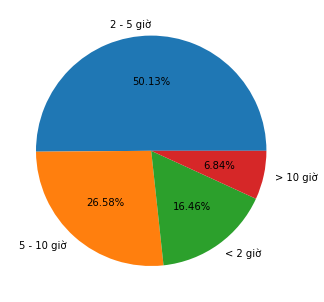

<Figure size 1440x720 with 0 Axes>

In [16]:
labels = student_mat_df["studytime"].unique().tolist()
labels
amount = student_mat_df["studytime"].value_counts().tolist()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
amount
ax.pie(amount, labels = labels,autopct='%1.2f%%')
plt.show()
plt.gcf().set_size_inches(20,10)

- Hầu hết các học sinh dành từ 2 đến 5 giờ và 5 đến 10 giờ 1 tuần để học. 

Text(0, 0.5, 'Thời gian học')

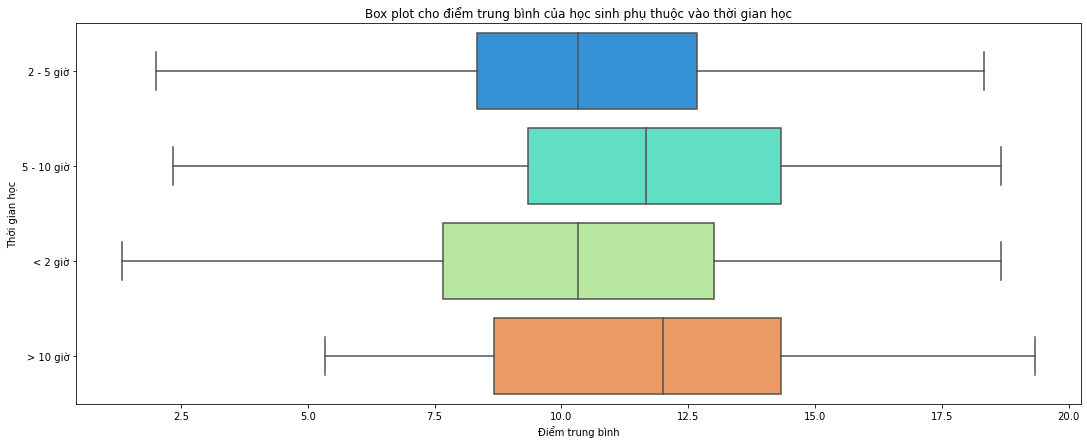

In [17]:
plt.figure(figsize=(18,7))
plt.title("Box plot cho điểm trung bình của học sinh phụ thuộc vào thời gian học")
sns.boxplot(y="studytime", 
            x="G_avg", 
            data = student_mat_df, 
            orient="h", 
            palette = 'rainbow')
plt.xlabel("Điểm trung bình")
plt.ylabel("Thời gian học")

- Kết quả trung bình thấp nhất được chỉ ra bởi những sinh viên dành ít hơn hai giờ một tuần để học tập. Điều đó là tất nhiên ! Mình là sinh viên mình có thể thấy được thời gian này là không đủ.
- Rất ít sinh viên dành 10 giờ 1 tuần để học. Nhưng điều đó cho ta thấy kết quả rất tốt. Chúng ta nên chăm chỉ học tập hơn

### Câu 2: Uống rượu ảnh hưởng như thế nào đến kết quả kì thi Toán ?

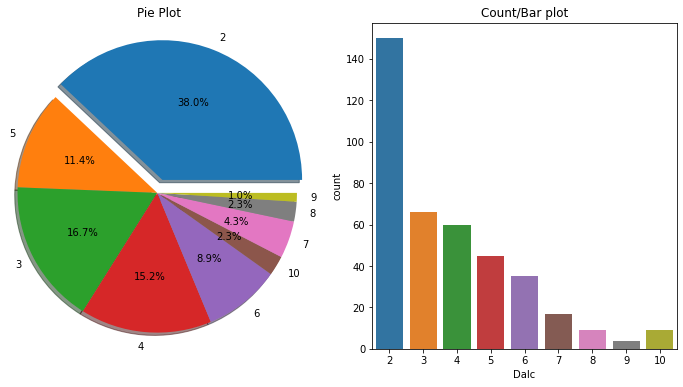

In [18]:
# Pie plot & Bar plot
#setup pie plot
labels= student_mat_df["Dalc"].unique()
sizes = student_mat_df["Dalc"].value_counts()[labels]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

#plotting pie plot
ax1.pie(sizes,
        explode=explode, 
        labels=labels,
        autopct='%1.1f%%', 
        shadow=True);
ax1.axis('equal')
ax1.set_title("Pie Plot")
#plotting bar plot
sns.countplot(x="Dalc", 
              data=student_mat_df, 
              ax=ax2).set_title("Count/Bar plot");

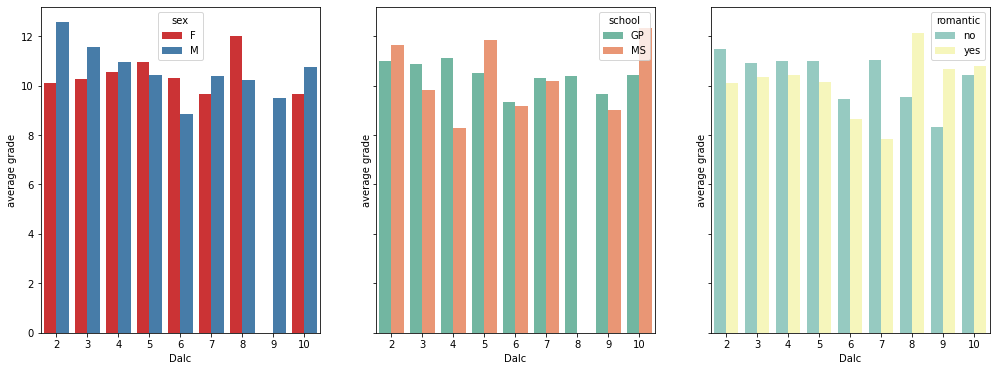

In [19]:
def bivariatte_barplot(df, x="Dalc", y="G_avg", hue=None, ax=None, color_set=1):
    pivtab_ser = df.groupby([x, hue])[y].mean().reset_index()
    #plotting
    sns.barplot(x=x, y=y, hue=hue,
                data=pivtab_ser, ax=ax,
                palette="Set%s"%(color_set+1)).set_ylabel("average grade")
hues = ['sex', 'school', 'romantic']

#plotting
fig, axes = plt.subplots(1, len(hues), figsize=(17,6), sharey=True)
for idx, hue in enumerate(hues):
      bivariatte_barplot(student_mat_df, 
                         hue=hue, 
                         ax=axes[idx], 
                         color_set=idx)

In [20]:
student_mat_df["is_healthy"] = student_mat_df["health"]>=3

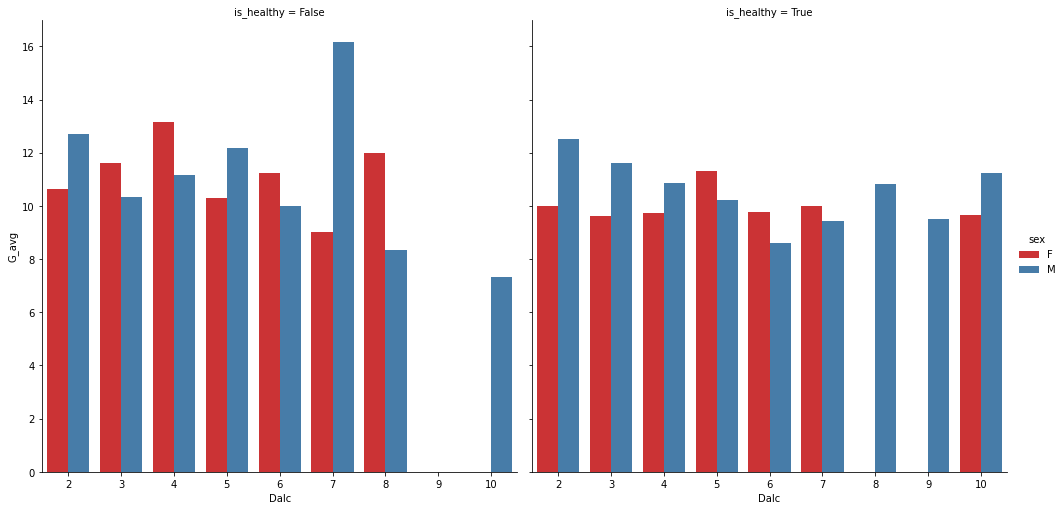

In [21]:
def multivariatte_factplot(x="Dalc", y="G_avg", hue="sex", col="is_healthy", df=pd.DataFrame(), cs=1):
    piv_tab = df.groupby([x, hue, col])[y].mean().reset_index()
    sns.factorplot(x=x, y=y, hue=hue, col=col, data=piv_tab, kind='bar', palette="Set%s"%cs, size=7);
multivariatte_factplot(df=student_mat_df);

- Nhận thấy điều thú vị là Nam nếu sức khỏe không khỏe mạnh với chỉ số tiêu thụ rượu là 7 thì lại có thành tích học tập tốt nhất. Nhưng ngược lại đối với phụ nữ thì mức độ tiêu thụ rượu là 7 lại điểm thấp nhất trong tất cả các nhóm
- Điều lạ lùng, khó hiểu thì nam giới khỏe mạnh với mức độ tiêu thụ là 6 với 7 lại kém hơn rất nhiều với những người nam giới không khỏe mạnh.
- Phụ nữ không khỏe mạnh với mức độ tiêu thu rượu là 4 lại hoạt động tốt nhất trong các nhóm phụ nữ có lẽ nếu đúng liều lượng sẽ giúp tâm trạng vui vẻ nâng cao hiệu suất học tập.
- Một điều có thể chắc chắn rằng nếu sức khỏe không tốt thêm việc uống nhiều rượu nhất thì chắn chắc điểm sẽ thấp nhất mà thôi


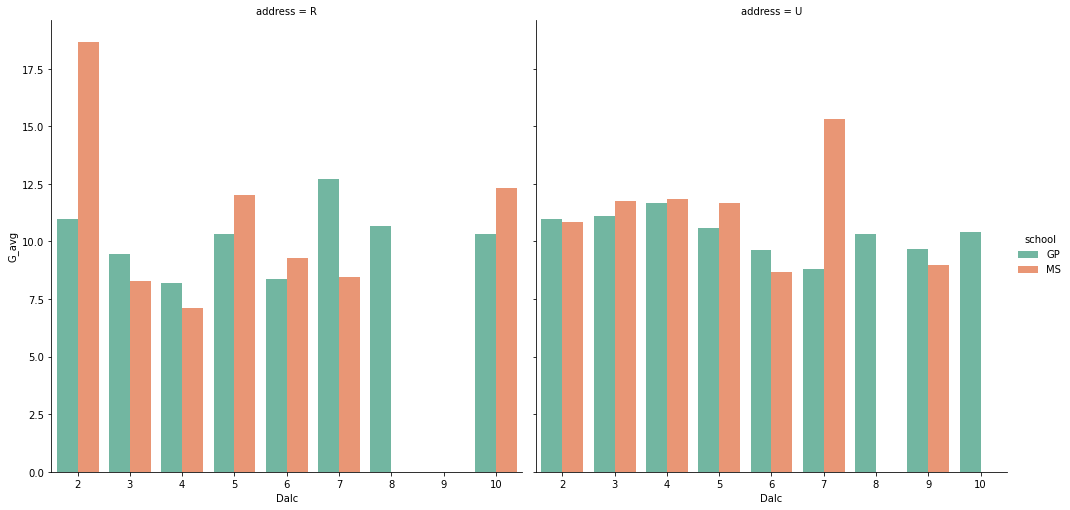

In [22]:
multivariatte_factplot(hue="school", col="address", df=student_mat_df, cs=2)

- Ở vùng nông thôn thì những học sinh không thường uống rượu thì đạt điểm cao nhất. Cho thấy các học sinh đó quản lý tốt thời gian học và vui chơi của mình.
- Ở khu vực thành thị thì điểm trung bình phân bố đồng đều hơn. Điều thú vị thì những học sinh có mức độ tiêu thụ rượu ở khá cao là 7 lại đạt điểm cao nhất.

### Câu 3: Đâu là 3 nguyên nhân chủ yếu ảnh hưởng tới kết quả học tập của học sinh ?

Nguyên nhân ảnh hưởng tới kết quả học tập có thể kể đến như:
- Mối quan hệ với gia đình không tốt
- Thời gian học ít
- Hẹn hò
- Không đi học thêm
- Không muốn học đại học
- Sức khỏe không được tốt
- Sử dụng nhiều rượu bia

### Tiền xử lý

Đầu tiên, ta cần lấy ra danh sách các học sinh có điểm trung bình `G1`, `G2`, `G3` <10 và đặt tên là `bad_grade_df`

In [45]:
bad_grade_df = student_df[student_df["G_avg"]<10]

Ta thêm các thuộc tính nhị phân là các nguyên nhân ở trên ,và tính toán đẻ tìm ra 3 thuộc tính có số học sinh chiếm nhiều nhất

Text(0, 0.5, 'Reson')

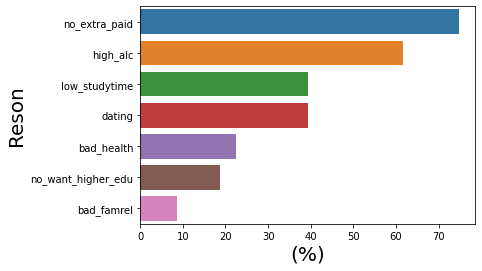

In [65]:
bad_grade_df["high_alc"] = (bad_grade_df["Dalc"] + bad_grade_df["Walc"]) < 5
bad_grade_df["bad_famrel"] = bad_grade_df["famrel"] <3
bad_grade_df["low_studytime"] = bad_grade_df["studytime"] == 1
bad_grade_df["dating"] = bad_grade_df["romantic"] == "yes"
bad_grade_df["no_extra_paid"] = bad_grade_df["paid"]  == "no"
bad_grade_df["no_want_higher_edu"] = bad_grade_df["higher"] == "no"
bad_grade_df["bad_health"] = bad_grade_df["health"]<3
df = bad_grade_df[["high_alc",
    "bad_famrel",
    "low_studytime",
    "dating",
    "no_extra_paid",
    "no_want_higher_edu",
    "bad_health",
   ]]

df = df.agg(lambda x : (x==1).sum()*100/x.count())
df = df.sort_values(ascending=False)
p = sns.barplot(y=df.keys(),x=df.values);
p.set_xlabel("(%)",fontsize = 20)
p.set_ylabel("Reson", fontsize = 20)

3 nguyên nhân chủ yếu đó là không đi học thêm, dùng nhiều rượu bia, thời gian học tập ít

In [ ]:
def edu (s):
    return s.replace({
        0: 'Không có',
        1: 'Tiểu học',
        2: 'Trung học cơ sở',
        3: 'Trung học phổ thông',
        4: 'Đại học'
    })
student_df["Medu"] = student_df["Medu"].agg(edu)
student_df["Fedu"] = student_df["Fedu"].agg(edu)

In [ ]:
student_por_df = student_df.loc[student_df["subject"] == "P"]
s = (student_por_df["Dalc"]/2).astype("int64")
def quantity(s):
        return s.replace({
    1: 'very low',
    2: 'low',
    3: 'normal',
    4: 'high',
    5: 'very high'
})
student_por_df["Dalc"] = s.agg(quantity)
piv_tab = student_por_df.groupby(["Dalc", "sex", "schoolsup"])["G_avg"].mean().reset_index()
sns.factorplot(x="Dalc", 
               y="G_avg", 
               hue="sex", 
               col="schoolsup", 
               data=piv_tab, 
               kind='bar', palette="Set%s"%1, size=7);

# df = student_df[["age", "Dalc"]]
# s = df.groupby(["age"])["Dalc"].mean().to_frame().reset_index()
# sns.barplot(x="age",y="Dalc", data=s).set_title("Bar plot");


In [ ]:
fig, ax = plt.subplots()
sns.histplot(
    data=student_por_df, x='G_avg', hue='schoolsup', multiple='dodge',
    bins=range(0, 20, 1), ax=ax
)


In [ ]:
sns.histplot(
    data=student_por_df, x='G_avg', hue='Dalc', multiple='dodge',
    bins=range(0, 20, 1)
)
plt.gcf().set_size_inches(20,15)

In [ ]:
bad_grade_df = student_por_df[student_por_df["G_avg"]<10]
s= bad_grade_df[["Dalc","guardian"]].groupby(["guardian"]).count()
s.unstack(1)


In [ ]:
s= bad_grade_df[["age","Dalc","G_avg"]].groupby(["age","Dalc"]).count()
s.unstack(1)
# s

In [ ]:
bad_grade_df = student_df[student_df["G_avg"]<10]
df = bad_grade_df.copy()
df["bad_famrel"] = df["famrel"] <2
df["low_studytime"] = df["studytime"] == "< 2 giờ"
df["dating"] = df["romantic"] == "yes"
df["no_extra_paid"] = df["paid"]  == "no"
df["no_want_higher_edu"] = df["higher"] == "no"
df["goout_high"] = df["goout"]>3
df["health_bad"] = df["health"]<3
df[df["health_bad"] == 1]
df = df[["bad_famrel",
    "low_studytime",
    "dating",
    "no_extra_paid",
    "no_want_higher_edu",
    "goout_high",
    "health_bad",
   ]]
def aabc(s):
    return(s==1).sum()
df = df.agg(lambda x : (x==1).sum()*100/x.count())
df.sort_values(ascending=False)